## Customer Segmentation


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv('./data/mall_customers.csv')


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape



(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.drop('CustomerID',axis=1,inplace=True)

In [13]:
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


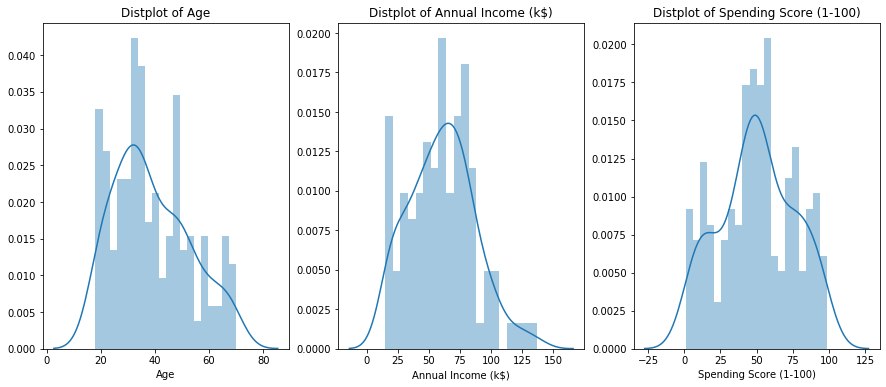

In [21]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.distplot(df[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()


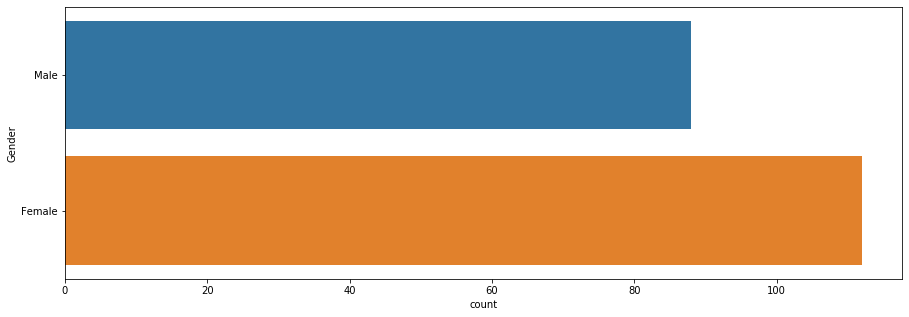

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

In [26]:
sns.countplot()

TypeError: Must pass values for either `x` or `y`

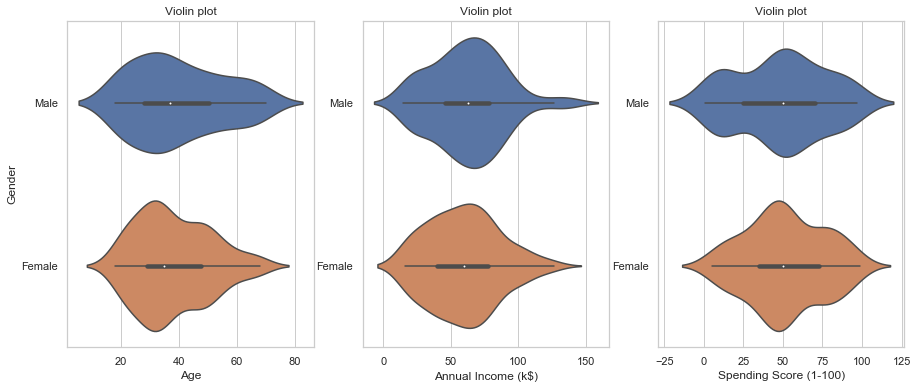

In [29]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    sns.violinplot(x=cols,y='Gender',data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin plot')
plt.show()


In [31]:
df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


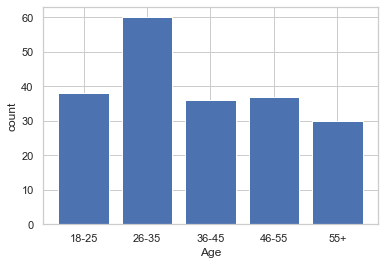

In [39]:
age_18_25=df[(df['Age']>=18) & (df['Age']<=25)]
age_26_35=df[(df['Age']>=26) & (df['Age']<=35)]
age_36_45=df[(df['Age']>=36) & (df['Age']<=45)]
age_45_55=df[(df['Age']>=46) & (df['Age']<=55)]
age_55above=df[df['Age']>=55]

agex=['18-25','26-35','36-45','46-55','55+']
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_45_55.values),len(age_55above.values)]

plt.bar(agex,agey)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

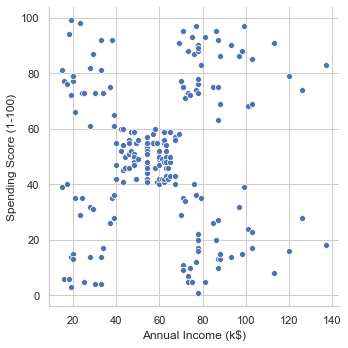

In [41]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

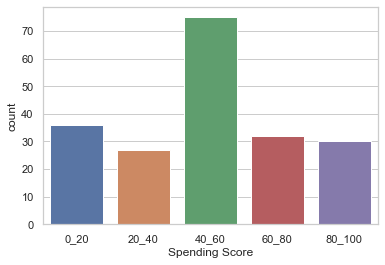

[36, 27, 75, 32, 30]

In [65]:
ss_0_20=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=0) & (df['Spending Score (1-100)']<=20)]
ss_20_40=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21) & (df['Spending Score (1-100)']<=40)]
ss_40_60=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41) & (df['Spending Score (1-100)']<=60)]
ss_60_80=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=61) & (df['Spending Score (1-100)']<=80)]
ss_80_100=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=81) & (df['Spending Score (1-100)']<=100)]


ssx=['0_20','20_40','40_60','60_80','80_100']
ssy=[len(ss_0_20.values),len(ss_20_40.values),len(ss_40_60.values),len(ss_60_80.values),len(ss_80_100.values)]

sns.barplot(x=ssx,y=ssy)
plt.xlabel('Spending Score')
plt.ylabel('count')
plt.show()


#### Applying K-means segmentation

In [124]:
X1=df.loc[:,['Age','Spending Score (1-100)']].values




In [125]:
from sklearn.cluster import KMeans

In [126]:
wcss=[]

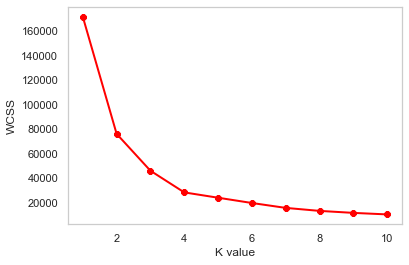

In [127]:
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [128]:
###we can observe an elbow at K=4

In [129]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 0 0 2 1 0 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2
 1 2 1 3 1 3 0 2 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 0 1 3 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 3 1
 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [130]:
#printing centoids
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


Text(0, 0.5, 'Spending Score')

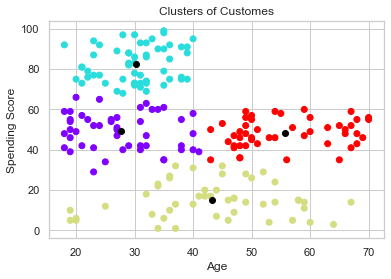

In [131]:
#visualizing the clusters
plt.scatter(X1[:,0],X1[:,1],c=label,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customes')
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [145]:
## Predicting a new customer would lie in which segment


In [147]:
X_new = np.array([[43, 76]]) 
 
new_customer = kmeans.predict(X_new)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 1


In [132]:
### now apllying segementation on Annual Income and Spending Score

In [133]:
X2=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

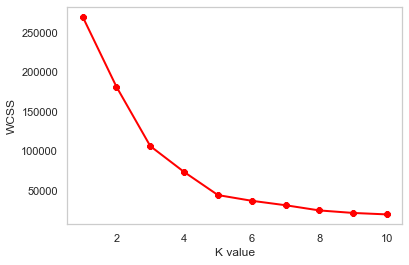

In [135]:
wcss=[]
for k in range(1,11):
    kmeans2=KMeans(n_clusters=k,init='k-means++')
    kmeans2.fit(X2)
    wcss.append(kmeans2.inertia_)
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [103]:
#we observe an elbow at k=5

In [136]:
kmeans2=KMeans(n_clusters=5)
label=kmeans2.fit_predict(X2)
print(label)

[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 3 4 1 4 3 4 3 4 1 4 3 4 3 4 3 4 3 4 1 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


In [105]:
#printing centroids

In [144]:
print(kmeans2.cluster_centers_)

[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]]


Text(0, 0.5, 'Spending Score')

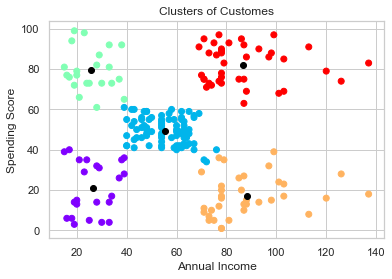

In [138]:
#visualizing the clusters
plt.scatter(X2[:,0],X1[:,1],c=label,cmap='rainbow')
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customes')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [149]:
## Predicting a new customer with annual income=76k and spending score=56 would lie in which segment

In [156]:
X_new = np.array([[76, 56]]) 
 
new_customer = kmeans2.predict(X_new)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 1


In [139]:
#Now performing customer segmentation on Age,Annual Income and Spending Score


In [140]:
X3=df.iloc[:,1:].values
X3


array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

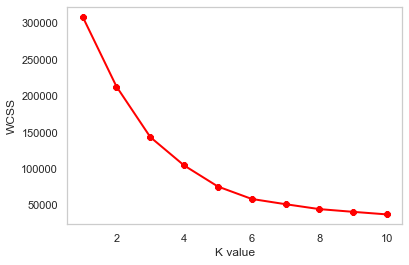

In [141]:
wcss=[]
for k in range(1,11):
    kmeans3=KMeans(n_clusters=k,init='k-means++')
    kmeans3.fit(X3)
    wcss.append(kmeans3.inertia_)
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [121]:
# we get an elbow at k=5

In [142]:
kmeans3=KMeans(n_clusters=5)
label=kmeans3.fit_predict(X3)
print(label)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [143]:
#printing centoids
print(kmeans3.cluster_centers_)

[[42.9375     55.0875     49.7125    ]
 [32.69230769 86.53846154 82.12820513]
 [25.27272727 25.72727273 79.36363636]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]]


In [153]:
## Predicting a new customer with age=43 ,annual income=76k and spending score=56 would lie in which segment

In [155]:
X_new = np.array([[43,76, 56]]) 
 
new_customer = kmeans3.predict(X_new)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 0
